In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [26]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
import tensorflow
from tensorflow import keras

In [27]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [28]:
# this is for creating new images
train_generator = datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats/train', # target directory
    target_size=(200, 200),  # all images resized to 200 X 200
    batch_size=32,
    class_mode='binary', # since we are using binary_crossentropy loss, we need binary label
)

Found 20000 images belonging to 2 classes.


In [29]:
batch_size=32
validation_data = keras.utils.image_dataset_from_directory(
    directory=r'/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(200, 200)
)

Found 5000 files belonging to 2 classes.


In [30]:
# Note: Only new created images are used to train the model, the original images are not used by algorithm to train the model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'],
             )

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 198, 198, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 97, 97, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,195,553 (8.38 MB)

 Trainable params: 2,195,553 (8.38 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history  = model.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,  # Number of batches per epoch
    epochs=25,
    validation_data=validation_data,
    validation_steps=1000 // batch_size  # Number of validation batches per epoch
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 333ms/step - accuracy: 0.4956 - loss: 0.8069 - val_accuracy: 0.4929 - val_loss: 2.6602
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.5129 - loss: 0.6964 - val_accuracy: 0.5010 - val_loss: 14.5362
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 341ms/step - accuracy: 0.5524 - loss: 0.6942 - val_accuracy: 0.5605 - val_loss: 2.2918
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - accuracy: 0.5664 - loss: 0.6814 - val_accuracy: 0.5141 - val_loss: 29.6832
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 285ms/step - accuracy: 0.5743 - loss: 0.6805 - val_accuracy: 0.5081 - val_loss: 26.2474
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.5873 - loss: 0.6705 - val_accuracy: 0.5071 - val_loss: 55.1177
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step - accuracy: 0.6107 - loss: 0.6698 - val_accuracy: 0.5534 - val_loss: 26.1278
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.6088 - loss: 0.6504 - val

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6104 - loss: 0.6658 - val_accuracy: 0.6522 - val_loss: 32.3727
Epoch 12/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 386ms/step - accuracy: 0.6501 - loss: 0.6337 - val_accuracy: 0.6220 - val_loss: 33.7176
Epoch 13/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 315ms/step - accuracy: 0.6514 - loss: 0.6278 - val_accuracy: 0.5796 - val_loss: 48.3118
Epoch 14/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.6618 - loss: 0.6351 - val_accuracy: 0.6865 - val_loss: 34.1907
Epoch 15/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.6737 - loss: 0.6090 - val_accuracy: 0.6341 - val_loss: 66.9271
Epoch 16/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.6842 - loss: 0.5980 - val_accuracy: 0.6230 - val_loss: 46.9077
Epoch 17/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.6866 - loss: 0.6071 - val_accuracy: 0.5655 - val_loss: 63.3757
Epoch 18/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - accuracy: 0.6344 - loss: 0.6403 - val_acc

In [34]:
from matplotlib import pyplot as plt

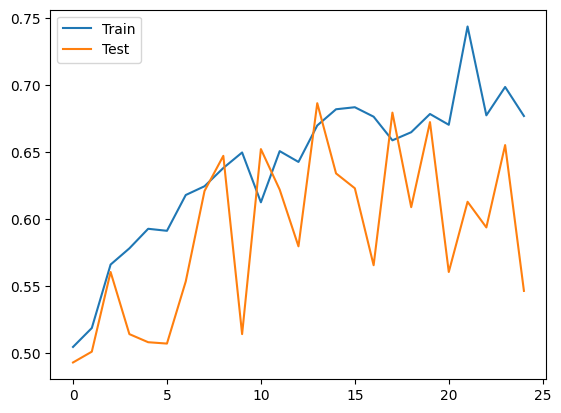

In [35]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()

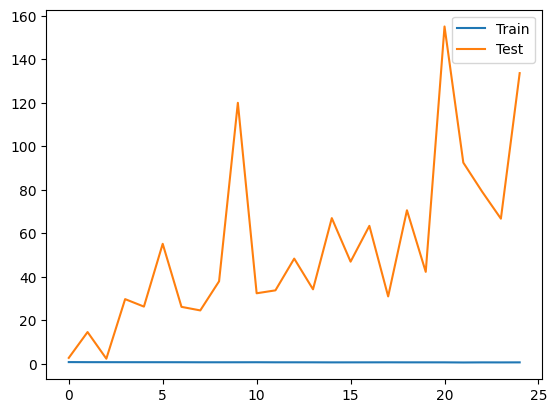

In [36]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()